In [1]:
import nltk
from nltk.corpus import reuters
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download the reuters dataset if not already present
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to C:\Users\Arunya
[nltk_data]     Senadeera\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Arunya
[nltk_data]     Senadeera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Prepare the corpus from the NLTK Reuters dataset
def preprocess_reuters():
    """
    Preprocess the Reuters dataset into tokenized sentences for training GloVe.
    Returns:
        sentences (list): A list of tokenized sentences.
    """
    sentences = []
    for file_id in reuters.fileids():
        words = nltk.word_tokenize(reuters.raw(file_id).lower())
        sentences.append(words)
    return sentences

In [5]:
# Function to train GloVe using Word2Vec (CBOW-based approximation)
def train_glove_model(sentences, vector_size=100, window_size=2, min_count=5, epochs=10):
    """
    Train a GloVe-like model using Word2Vec from Gensim.
    Parameters:
        sentences (list): Tokenized sentences from the corpus.
        vector_size (int): Dimensionality of the word embeddings.
        window_size (int): The context window size (default: 2).
        min_count (int): Minimum word frequency to include in the vocabulary.
        epochs (int): Number of training epochs.
    Returns:
        model (Word2Vec): The trained Word2Vec model.
    """
    model = Word2Vec(
        sentences,
        vector_size=vector_size,
        window=window_size,
        min_count=min_count,
        sg=0,  # CBOW model (default behavior of GloVe)
        epochs=epochs
    )
    return model

In [6]:
# Preprocess the Reuters dataset
sentences = preprocess_reuters()

In [7]:
# Train the GloVe-like model
glove_model = train_glove_model(sentences, vector_size=100, window_size=2)

In [8]:
# Example usage of the trained model
word_vectors = glove_model.wv
print("Vector for 'coffee':", word_vectors['coffee'])
print("Most similar to 'obama':", word_vectors.most_similar('obama'))

Vector for 'coffee': [-0.2191415   0.4598009   0.2871161   0.83043694  0.6061324   0.06429027
  0.49268156  2.0731454  -1.941532   -0.05329357 -0.3271935  -1.0456574
 -1.412303    0.8062069  -0.02223909 -0.07627673 -0.15862551  0.91173005
 -0.6395679  -0.37854832 -0.11046285  0.26060668 -1.337606    1.5058206
  0.92164904 -0.8014034   0.39773458  1.2006003   0.76542383 -0.3500184
 -1.8092761   0.44869685  0.7035125  -0.27707583  0.00237844  1.0330285
 -0.18642372 -0.5868566   1.3952365  -0.59762007  0.0203018  -1.1787736
  0.39058673  1.5920978   1.0052571   0.27234235 -0.45426014  0.6280082
 -1.4392488   1.1674234   0.75116765 -1.5883415   0.8602698  -0.6536563
  0.26608095 -0.8032028   0.59538096 -0.960481    0.2719245   0.9167623
  0.9727404   0.7884941  -1.8808596  -0.30275804 -0.49108636  1.2997365
  0.7091781   0.43464136  1.063069    0.35413986 -0.53478384 -0.7845688
 -0.30239704 -1.4773711   1.3907388  -0.9537378  -2.039637   -0.04352323
  1.3863492   0.23946902  1.3010528   0.

KeyError: "Key 'obama' not present in vocabulary"

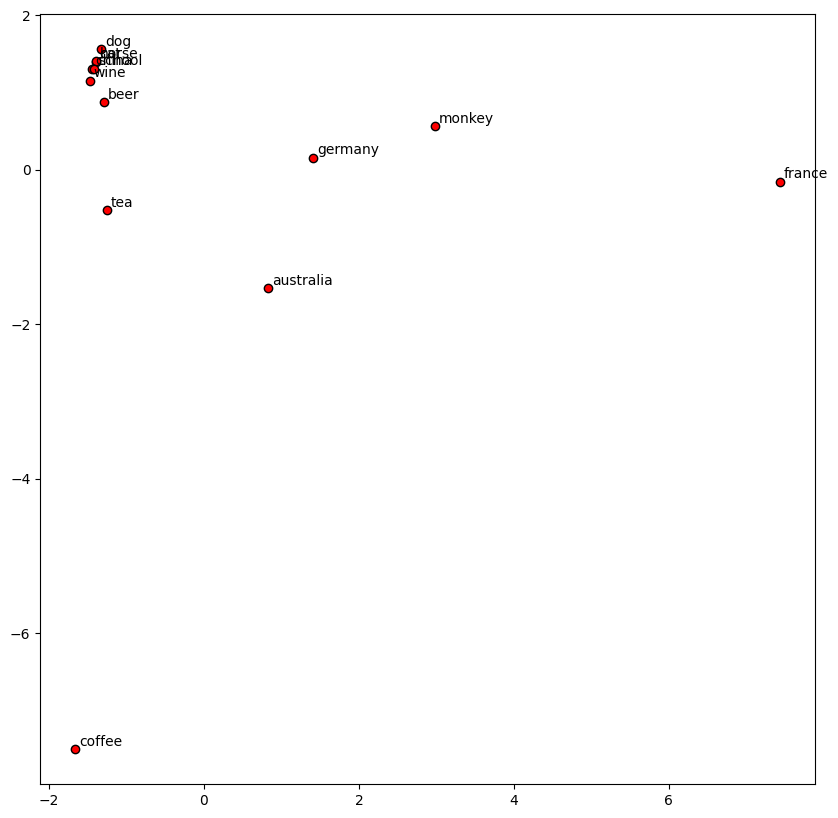

In [9]:
# PCA Visualization
words = ['coffee', 'tea', 'beer', 'wine', 'dog', 'cat', 'horse', 'monkey',
         'france', 'germany', 'australia', 'china', 'school', 'college', 'university']

word_vectors_array = np.array([word_vectors[w] for w in words if w in word_vectors])
twodim = PCA().fit_transform(word_vectors_array)[:, :2]

plt.figure(figsize=(10, 10))
plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(words, twodim):
    plt.text(x + 0.05, y + 0.05, word)
plt.show()

# Credit: The dataset used for training is sourced from the Reuters Corpus provided by the NLTK library.